In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
# Generate sample data
X, y = make_classification (n_samples=1000, n_features=20, n_informative=15, n_classes=2, random_state=42)

In [4]:
# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print (f"Cross-validation scores: {cv_scores}")
print (f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.885 0.925 0.905 0.88  0.92 ]
Mean CV score: 0.9030


In [11]:
# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

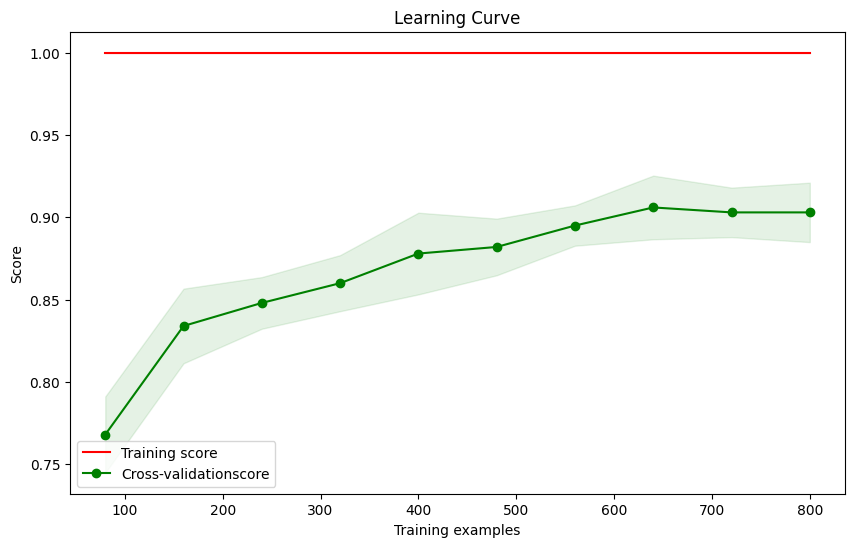

In [14]:
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, '-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validationscore")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend (loc= "best")
plt.show()